# WeatherPy

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from config import api_key
from scipy.stats import linregress
from pprint import pprint

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [82]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [111]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [119]:
# set up lists to hold responses
weather_list = []
i = 0

for city in cities:
    i = i + 1
    response = requests.get(query_url + city).json()
    try:
        cityid = response["id"]
        cloudiness = response["clouds"]["all"]
        country = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        lat = response['coord']['lat']
        long = response['coord']['lon']
        temp = response['main']['temp_max']
        wind = response['wind']['speed']
        weather_list.append({"City": city, 
                             "City ID": cityid, 
                             "Cloudiness": cloudiness, 
                             "Country": country, 
                             "Date": date, 
                             "Humidity": humidity, 
                             "Lat": lat, 
                             "Long": long, 
                             "Max Temp":temp, 
                             "Wind Speed": wind,})
        print(f"Record#{i} {city}")
    except:
        print(f"Record Not found #{i} {city}")

Record Not found #1 kamenskoye
Record#2 pevek
Record Not found #3 we
Record#4 saint george
Record#5 luderitz
Record#6 chokurdakh
Record#7 da nang
Record#8 ribeira grande
Record#9 geraldton
Record Not found #10 nizhneyansk
Record#11 mount gambier
Record#12 yakeshi
Record#13 bredasdorp
Record Not found #14 illoqqortoormiut
Record#15 klaksvik
Record#16 albany
Record#17 saskylakh
Record#18 puerto ayora
Record#19 iqaluit
Record#20 new norfolk
Record#21 victoria
Record#22 phan thiet
Record#23 barrow
Record#24 chara
Record#25 batagay
Record Not found #26 khonuu
Record#27 fort nelson
Record#28 solvychegodsk
Record#29 ushuaia
Record Not found #30 burica
Record#31 kotdwara
Record Not found #32 amderma
Record#33 huangchuan
Record#34 bulolo
Record#35 georgetown
Record#36 berkeley
Record#37 east london
Record#38 wahiawa
Record#39 coremas
Record Not found #40 halalo
Record#41 krutikha
Record#42 yellowknife
Record#43 okhotsk
Record#44 rikitea
Record#45 busselton
Record#46 avarua
Record#47 ilorin
Reco

Record#391 kragero
Record#392 belaya gora
Record#393 alofi
Record#394 shenjiamen
Record#395 akyab
Record#396 mingshui
Record#397 kasur
Record Not found #398 manzil tamim
Record Not found #399 petrolandia
Record Not found #400 toftir
Record#401 san patricio
Record#402 sayyan
Record#403 milan
Record#404 kishanganj
Record#405 gubkinskiy
Record#406 nizwa
Record#407 satipo
Record#408 coquimbo
Record#409 urucara
Record#410 shimoda
Record#411 kathmandu
Record#412 ostrovnoy
Record#413 lewiston
Record#414 harper
Record#415 borovoy
Record#416 manta
Record Not found #417 tumannyy
Record#418 luganville
Record#419 rio grande
Record#420 ladario
Record#421 rundu
Record#422 alta floresta
Record#423 furano
Record#424 acarau
Record#425 hami
Record#426 el rosario
Record Not found #427 viligili
Record#428 okha
Record#429 baykit
Record#430 kalur kot
Record Not found #431 sentyabrskiy
Record#432 xuddur
Record#433 kushmurun
Record#434 inta
Record#435 brae
Record#436 cruzeiro do sul
Record#437 gunjur
Record#4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [120]:
# Create a data frame from list
weather_data = pd.DataFrame(weather_list)
weather_data.head()

,City,City ID,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,pevek,2122090,100,RU,1586547028,86,69.70,170.31,1.17,22.48
1,saint george,5546220,1,US,1586547016,44,37.10,-113.58,60.80,4.70
2,luderitz,3355672,0,NA,1586547058,77,-26.65,15.16,60.80,4.70
3,chokurdakh,2126123,0,RU,1586547201,96,70.63,147.92,18.79,10.54
4,da nang,1583992,20,VN,1586547201,88,16.07,108.22,77.00,4.68


In [130]:
weather_data.count()

City          564
City ID       564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Long          564
Max Temp      564
Wind Speed    564
dtype: int64

In [131]:
# Export to csv
weather_data.to_csv("output_data/cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

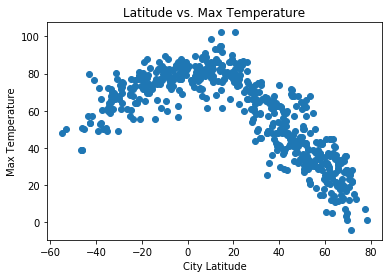

In [134]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values)
plt.title("Latitude vs. Max Temperature")
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature')
plt.savefig("output_data/latvstemp.png")
plt.show()

### This scatter plot shows that the closer cities are to the equator (latitude = 0), the higher the max temps. It also shows another trend that as cities move increasignly north (positive lat values) away from the equator, they experience more extreme temperature drops than cities that are further south. This would indicate that the north pole is colder, on average, than the south pole.

#### Latitude vs. Humidity Plot

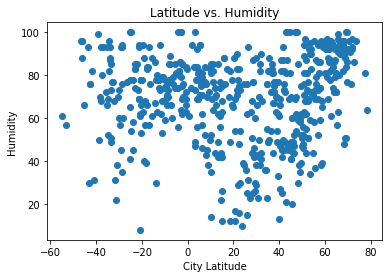

In [135]:
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.title("Latitude vs. Humidity")
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.savefig("output_data/latvshumid.png")
plt.show()

### This scatter plot shows that there doesn't seem to be a meaningful relationship between humidity and latitude.  

#### Latitude vs. Cloudiness Plot

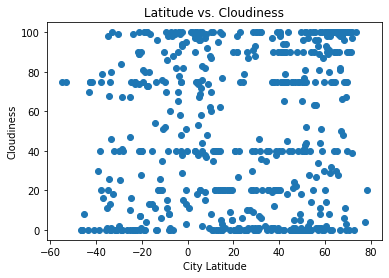

In [136]:
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.title("Latitude vs. Cloudiness")
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.savefig("output_data/latvscloud.png")
plt.show()

### Again, this scatter plot shows that there isnt a strong relationship between latitude and cloudiness. 

#### Latitude vs. Wind Speed Plot

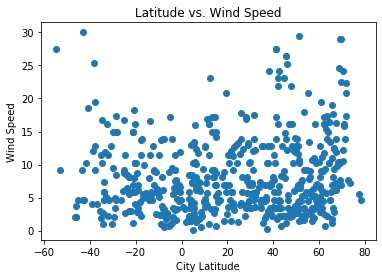

In [137]:
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.title("Latitude vs. Wind Speed")
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.savefig("output_data/latvswind.png")
plt.show()

### This scatter plot shows that wind speed increases slightly as you move away from the equator and toward the poles. 

## Linear Regression

In [164]:
# OPTIONAL: Create a function to create Linear Regression plotsfig, ax = plt.subplots()

def weather_reg (x_values, y_values, ylabel, title, coordinates):
    (slope, intercept, rvalue, pvalue, standarderror) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_equation, coordinates, fontsize = 10, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [165]:
weather_data.head()

,City,City ID,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,pevek,2122090,100,RU,1586547028,86,69.70,170.31,1.17,22.48
1,saint george,5546220,1,US,1586547016,44,37.10,-113.58,60.80,4.70
2,luderitz,3355672,0,NA,1586547058,77,-26.65,15.16,60.80,4.70
3,chokurdakh,2126123,0,RU,1586547201,96,70.63,147.92,18.79,10.54
4,da nang,1583992,20,VN,1586547201,88,16.07,108.22,77.00,4.68


In [166]:
# Create Northern and Southern Hemisphere DataFrames
North = weather_data.loc[(weather_data["Lat"] > 0), :]
South = weather_data.loc[(weather_data["Lat"] < 0), :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

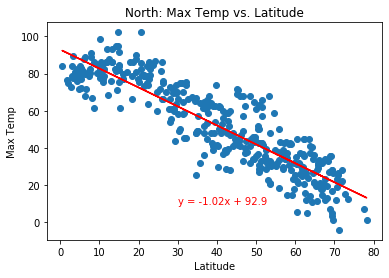

In [170]:
x_values = North['Lat']
y_values = North['Max Temp']
ylabel = "Max Temp"
title = "North: Max Temp vs. Latitude"
coordinates = (30,10)

weather_reg(x_values, y_values, ylabel, title, coordinates)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

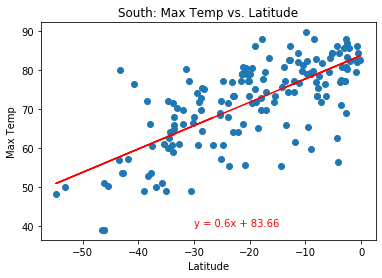

In [172]:
x_values = South['Lat']
y_values = South['Max Temp']
ylabel = "Max Temp"
title = "South: Max Temp vs. Latitude"
coordinates = (-30,40)

weather_reg(x_values, y_values, ylabel, title, coordinates)

### These regression plots show that in the Northern hemisphere there is negative relationship between temp and latitude, but in the south there is a positive relationship. Since the scales are moving opposite directions from 0 though, this really shows a similar relationship, which you can see from the regression equation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

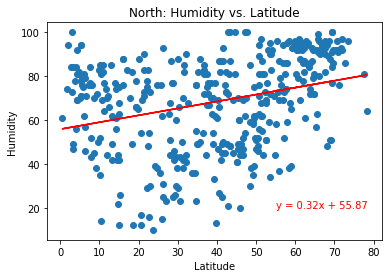

In [175]:
x_values = North['Lat']
y_values = North['Humidity']
ylabel = "Humidity"
title = "North: Humidity vs. Latitude"
coordinates = (55,20)

weather_reg(x_values, y_values, ylabel, title, coordinates)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

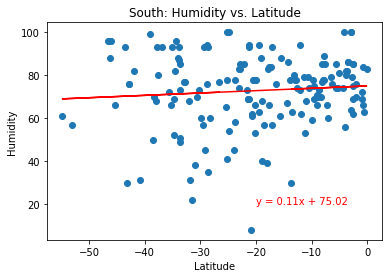

In [177]:
x_values = South['Lat']
y_values = South['Humidity']
ylabel = "Humidity"
title = "South: Humidity vs. Latitude"
coordinates = (-20,20)

weather_reg(x_values, y_values, ylabel, title, coordinates)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

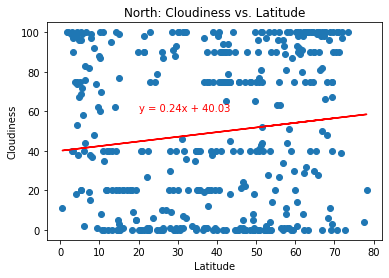

In [182]:
x_values = North['Lat']
y_values = North['Cloudiness']
ylabel = "Cloudiness"
title = "North: Cloudiness vs. Latitude"
coordinates = (20,60)

weather_reg(x_values, y_values, ylabel, title, coordinates)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

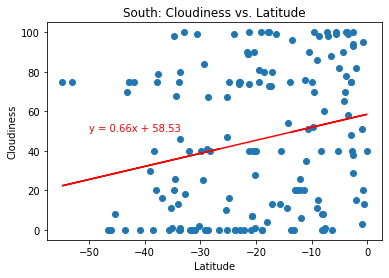

In [186]:
x_values = South['Lat']
y_values = South['Cloudiness']
ylabel = "Cloudiness"
title = "South: Cloudiness vs. Latitude"
coordinates = (-50,50)

weather_reg(x_values, y_values, ylabel, title, coordinates)

### When it comes to cloudiness, both the Northern and Southern hempisphere show there is very little relationship between cloudiness and latitude, as idicated by the slope values close to 0. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

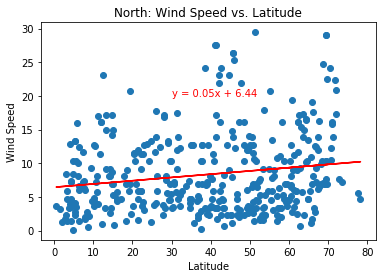

In [188]:
x_values = North['Lat']
y_values = North['Wind Speed']
ylabel = "Wind Speed"
title = "North: Wind Speed vs. Latitude"
coordinates = (30,20)

weather_reg(x_values, y_values, ylabel, title, coordinates)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

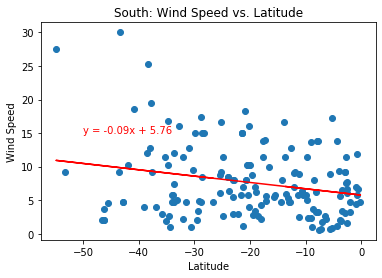

In [190]:
x_values = South['Lat']
y_values = South['Wind Speed']
ylabel = "Wind Speed"
title = "South: Wind Speed vs. Latitude"
coordinates = (-50,15)

weather_reg(x_values, y_values, ylabel, title, coordinates)

### Finally, wind speed also does not seem to highly correlate with latitude. In fact, it has the smallest slopes, indicating a very low correlation.